# Heart Attack Risk Prediction Project


## My Final Classification Project

______________________________

#### Table of Contents

- Importing the needed libraries
- Loading the data from "heart.csv"
- Searching for the best model
  - Logistic Regression
  - Random Forest
- Showing the results and selecting the best model



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)


## Loading the Data 


In [29]:
df = pd.read_csv("heart.csv")
X = df.drop(columns=["output"]) 
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


### Logistic Regression Result


=== Logistic Regression Metrics ===
ROC-AUC: 0.8712121212121212
Accuracy: 0.7868852459016393
F1: 0.8169014084507042
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

Confusion Matrix:
 [[19  9]
 [ 4 29]]


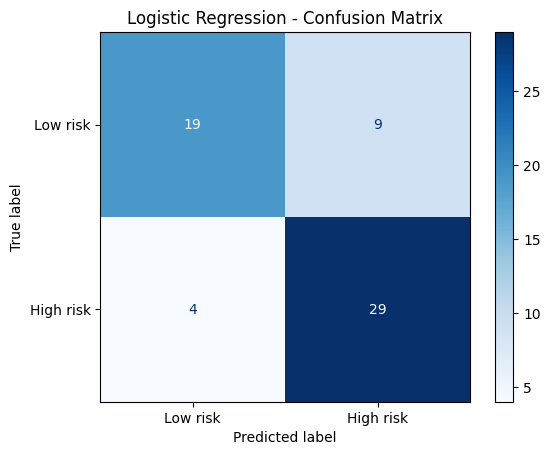

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
logreg.fit(X_train_scaled, y_train)
y_proba_log = logreg.predict_proba(X_test_scaled)[:,1]
y_pred_log = (y_proba_log >= 0.5).astype(int)

print("\n=== Logistic Regression Metrics ===")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm_log)
ConfusionMatrixDisplay(cm_log, display_labels=["Low risk","High risk"]).plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


### Logistic Regression Plots 

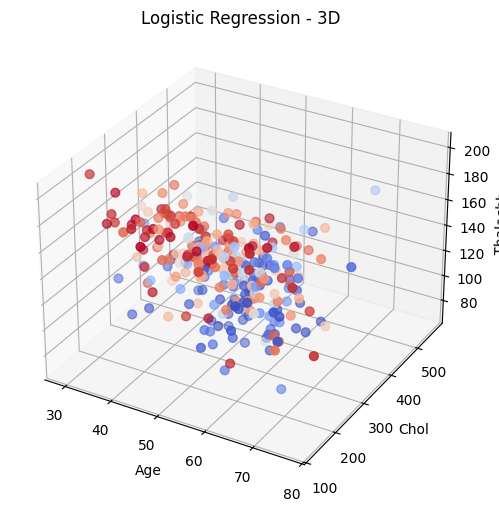

In [31]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["age"], df["chol"], df["thalachh"],
           c=logreg.predict_proba(scaler.transform(X))[:,1],
           cmap="coolwarm", s=40)
ax.set_xlabel("Age"); ax.set_ylabel("Chol"); ax.set_zlabel("Thalachh")
ax.set_title("Logistic Regression - 3D")
plt.show()

### Random Forest


=== Random Forest Metrics ===
ROC-AUC: 0.8993506493506493
Accuracy: 0.8032786885245902
F1: 0.8378378378378378
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61

Confusion Matrix:
 [[18 10]
 [ 2 31]]


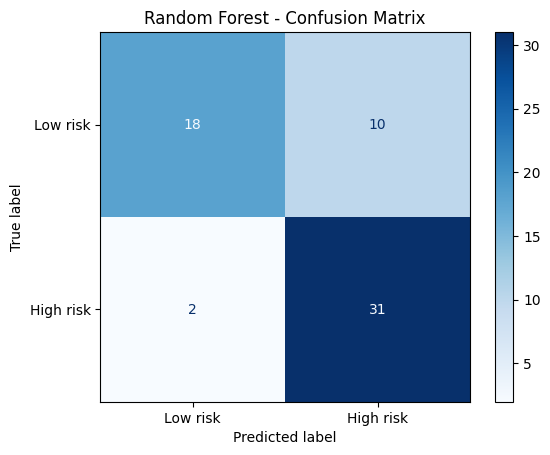

In [32]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced_subsample")
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:,1]
y_pred_rf = (y_proba_rf >= 0.5).astype(int)

print("\n=== Random Forest Metrics ===")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=["Low risk","High risk"]).plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()


### Random Forest Plots 

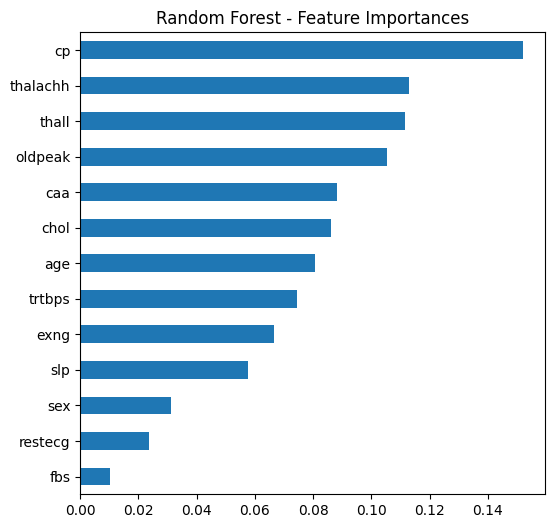

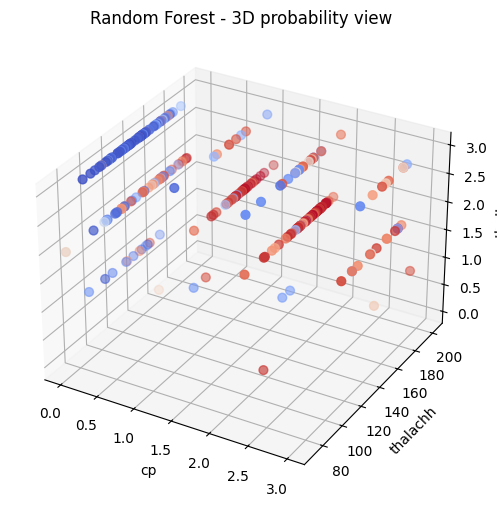

In [33]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot.barh(figsize=(6,6))
plt.title("Random Forest - Feature Importances")
plt.show()


top3 = importances.sort_values(ascending=False).index[:3]

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df[top3[0]], df[top3[1]], df[top3[2]],
           c=rf.predict_proba(X)[:,1], cmap="coolwarm", s=40)

ax.set_xlabel(top3[0])
ax.set_ylabel(top3[1])
ax.set_zlabel(top3[2])
ax.set_title("Random Forest - 3D probability view")
plt.show()


# The best Model to Use 

In [34]:
roc_log = roc_auc_score(y_test, y_proba_log)
roc_rf = roc_auc_score(y_test, y_proba_rf)
best = "Logistic Regression" if roc_log >= roc_rf else "Random Forest"
print("\n>>> Best model based on ROC-AUC:", best)



>>> Best model based on ROC-AUC: Random Forest


---

## Prepared by
### Arya Zolfaghari 
####  October 2025